In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np

In [8]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3,4]].values

In [7]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X

In [18]:
def distance(point1,point2):
    return np.sqrt(np.sum((point1-point2)**2))

In [38]:
def calculate_wcss(centroids, clusters, data):
    wcss = 0
    for i in range(centroids.shape[0]):
        cluster_points = data[clusters == i]
        centroid = centroids[i]
        distances = distance(cluster_points,centroid)**2
        wcss += np.sum(distances)
    return wcss

In [40]:
def knn(k):
    n=X.shape[0]
    # centroids = np.random.randn(k, 2)
    centroids = X[:k, :]
    # print(centroids)
    clusters=np.zeros(n)
    epochs=100
    for e in range(epochs):
        # print(centroids)
        for i in range(n):
            distances=[distance(X[i],centroid) for centroid in centroids]
            clusters[i]=np.argmin(distances)
        
        new_centroids=np.zeros((k,2))
        for i in range(k):
            points=[X[j] for j in range(n) if clusters[j]==i]
            # print(len(points))
            if len(points)>0:
                new_centroids[i]=np.mean(points,axis=0)
        
        if np.all(centroids==new_centroids):
            # print(e,"epochs")
            break
        else:
            centroids=new_centroids
        
    return clusters, centroids


In [44]:
wcss=[]
for k in range(1,13): 
    clusters, centroids=knn(k)
    print(k,end=": ")
    for i in range(k):
            points=[X[j] for j in range(200) if clusters[j]==i]
            print(len(points),end=" ")
    print()
    wcss.append(calculate_wcss(centroids,clusters,X))

1: 200 
2: 136 64 
3: 123 39 38 
4: 101 22 38 39 
5: 23 22 35 39 81 
6: 23 8 35 15 80 39 
7: 15 8 12 15 76 39 35 
8: 15 6 12 17 76 28 35 11 
9: 14 6 8 17 76 28 5 11 35 
10: 10 6 8 15 43 42 5 11 32 28 
11: 11 6 3 15 47 36 9 11 24 28 10 
12: 11 7 3 9 47 35 9 6 24 28 10 11 


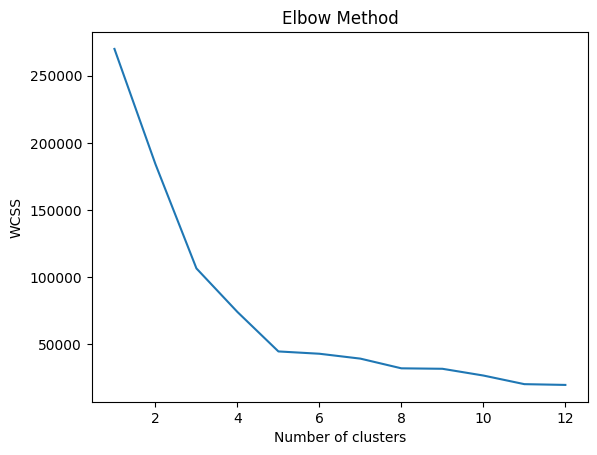

In [47]:
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
wcss

[269981.28,
 184102.15349264705,
 106348.37306211119,
 73880.64496247197,
 44448.45544793371,
 42731.723124701384,
 39090.406419895895,
 31860.928921903687,
 31523.146779046547,
 26490.289928772778,
 20062.64399619293,
 19487.655900954836]

In [50]:
clusters, centroids=knn(5)
print(centroids)

[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]]


In [51]:
print("WCSS:",calculate_wcss(centroids,clusters,X))

WCSS: 44448.45544793371


C:\Users\Admin\AppData\Local\Temp\ipykernel_8340\3976619223.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[j,0], X[j,1], c=colors[i], cmap='rainbow')


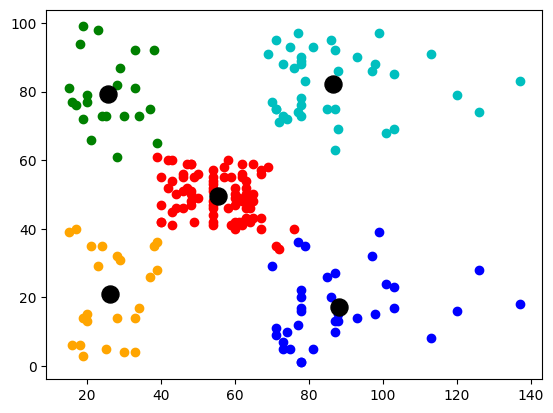

In [58]:
colors=['orange','g','b','c','r']
for i in range(5):
    for j in range(200):
        if clusters[j]==i:
            plt.scatter(X[j,0], X[j,1], c=colors[i], cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:, 1], s=150, c='k')
plt.show()